In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
HouseDF = pd.read_csv('houseprices.csv')

In [6]:
HouseDF.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [7]:
HouseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 324.0 bytes


In [8]:
HouseDF.describe().style.background_gradient(cmap='CMRmap')


,area,bedrooms,age,price
count,6.000000,5.000000,6.000000,6.000000
mean,3416.666667,4.200000,16.500000,648333.333333
std,587.934237,1.303840,8.288546,109117.673484
min,2600.000000,3.000000,8.000000,550000.000000
25%,3050.000000,3.000000,9.750000,572500.000000
50%,3400.000000,4.000000,16.500000,602500.000000
75%,3900.000000,5.000000,19.500000,722500.000000
max,4100.000000,6.000000,30.000000,810000.000000


In [9]:
HouseDF.isna().sum()


area        0
bedrooms    1
age         0
price       0
dtype: int64

In [10]:
HouseDF['bedrooms'] = HouseDF['bedrooms'].fillna( HouseDF['bedrooms'].mean() )
HouseDF.head()


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.2,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


TypeError: barplot() got multiple values for argument 'data'

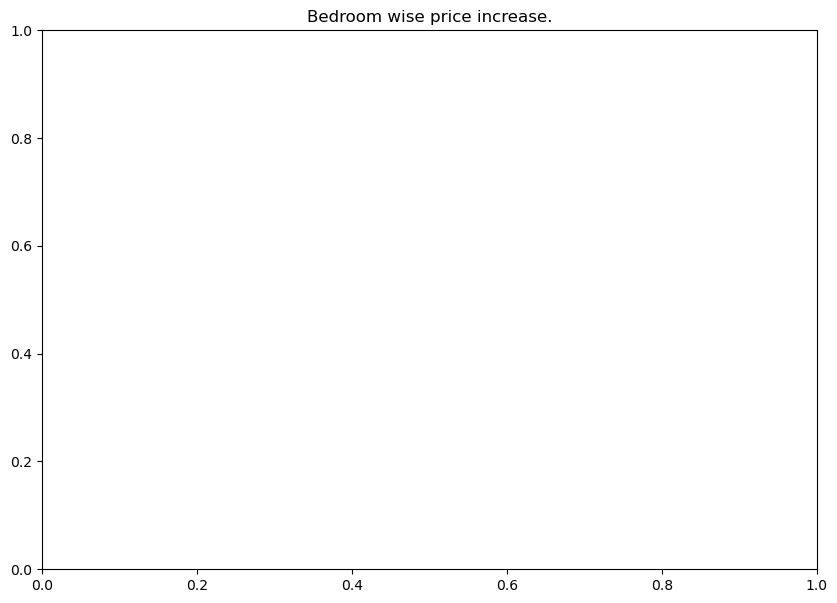

In [19]:
plt.figure(figsize=(10, 7))
plt.title("Bedroom wise price increase.")

sns.barplot('bedrooms', 'price', data=HouseDF)
plt.xlabel('Bedrooms', )
plt.ylabel('Price')
plt.show()

In [21]:
plt.figure(figsize=(10, 5))

sns.scatterplot('bedrooms', 'price', data=HouseDF)
plt.title("Price vs Bedroom Scatter plot")

plt.xlabel("House Bedrooms")
plt.ylabel('House Price')
plt.show()

TypeError: scatterplot() got multiple values for argument 'data'

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

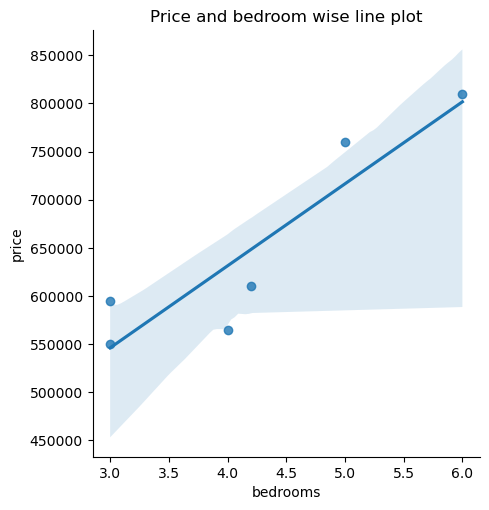

In [22]:
plt.figure(figsize=(10, 7))

sns.lmplot(x="bedrooms", y="price", data=HouseDF);
plt.title("Price and bedroom wise line plot")
plt.show()

In [23]:
mdl = LinearRegression()

In [24]:
X = HouseDF.drop(['price'], axis=1)
y = HouseDF['price']

In [25]:
HouseDF['bedrooms'] = HouseDF['bedrooms'].astype('int64')

HouseDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   area      6 non-null      int64
 1   bedrooms  6 non-null      int64
 2   age       6 non-null      int64
 3   price     6 non-null      int64
dtypes: int64(4)
memory usage: 324.0 bytes


In [26]:
print(X)
print("-" * 25)
print(y)


   area  bedrooms  age
0  2600       3.0   20
1  3000       4.0   15
2  3200       4.2   18
3  3600       3.0   30
4  4000       5.0    8
5  4100       6.0    8
-------------------------
0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64


In [27]:
HouseDF.fillna(HouseDF.mean())


,area,bedrooms,age,price
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,4,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


In [28]:
mdl.fit( X, y  )


LinearRegression()

In [29]:
mdl.predict([[ 4000, 2, 50 ]])


array([551989.04870256])

In [30]:
mdl.coef_


array([  116.66950551, 18756.28806982, -3675.75111708])

In [31]:
mdl.intercept_


231586.00639409182

In [32]:
score = mdl.score( X, y )

print(score * 100)

95.40926625396438
